<a href="https://colab.research.google.com/github/mizuki-yamada/mizuki.github.io/blob/master/(for_submit)Euler_RungeKutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#微分方程式
def function(x,y):
  return x+y

In [ ]:
#厳密解
def exact_solution(x):
  return 2*np.exp(x)-x-1

In [ ]:
#1次オイラー法
def Euler(x,y,delta_t):
  y+=delta_t*function(x,y)
  return y

--euler--
[1.0, 1.1, 1.22, 1.362, 1.5282, 1.72102, 1.943122, 2.197434, 2.487178, 2.815895, 3.187485]
--answer--
[1.0, 1.110342, 1.242806, 1.399718, 1.583649, 1.797443, 2.044238, 2.327505, 2.651082, 3.019206, 3.436564]


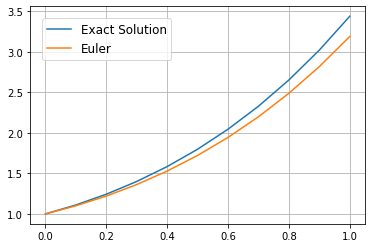

In [ ]:
#実行
N=10
init_x=0.0
init_y=1.0
delta_t=1.0/N

Euler_y=[init_y]
Exact_y=[init_y]
Error=[0]

x_range=np.arange(init_x,1.1,delta_t)
x=init_x
y=init_y

for i in range(N):
  y=Euler(x,y,delta_t)
  Euler_y.append(np.round(y,6))
  x+=delta_t
  exact_y=exact_solution(x)
  Exact_y.append(np.round(exact_y,6))
  
print("--euler--")
print(Euler_y)
print("--answer--")
print(Exact_y)

plt.plot(x_range,Exact_y,label='Exact Solution')
plt.plot(x_range,Euler_y,label='Euler')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=12)

plt.grid(which='major')
plt.show()

In [ ]:
#4次ルンゲクッタ法
def Runge_kutta(x,y,delta_t):
  
  k1=function(x,y)
  k2=function(x+delta_t/2,y+k1*delta_t/2)
  k3=function(x+delta_t/2,y+k2*delta_t/2)
  k4=function(x+delta_t,y+k3*delta_t)

  y+=delta_t*(k1+2*k2+2*k3+k4)/6

  return y

In [ ]:
#実行
RK_y=[init_y]

x=init_x
y=init_y

for i in range(N):
  y=Runge_kutta(x,y,delta_t)
  RK_y.append(np.round(y,6))
  x+=delta_t

print('--Rungekutta--')
print(RK_y)

--Rungekutta--
[1.0, 1.110342, 1.242805, 1.399717, 1.583648, 1.797441, 2.044236, 2.327503, 2.651079, 3.019203, 3.436559]


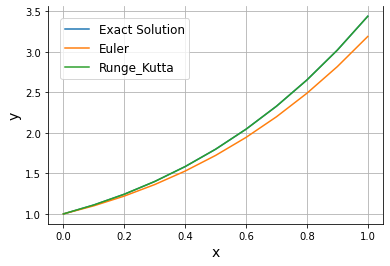

In [ ]:
#プロット
plt.plot(x_range,Exact_y,label='Exact Solution')
plt.plot(x_range,Euler_y,label='Euler')
plt.plot(x_range,RK_y,label='Runge_Kutta')

ax=plt.gca()
ax.spines['top'].set_color('none')
ax.set_xlabel('x',size=14,weight ='light')
ax.set_ylabel('y',size=14,weight='light')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=12)
plt.grid(which='major')
plt.show()

In [ ]:
#x=1.0
#分割数
N_error=np.arange(4,10**4+1)
#刻み幅
delta_x=1.0/N_error
#delta_x
init_x=0.0
init_y=1.0

x=init_x
y=init_y

In [ ]:
#オイラー法
total_y=[]#delta_xごとの全てのyを入れる

for j in range(len(delta_x)):
  x=init_x
  y=init_y
  for i in range(N_error[j]):
    y=Euler(x,y,delta_x[j])
    x+=delta_x[j]
  total_y.append(y)
  error_euler1=exact_solution(1.0)-total_y

In [ ]:
#x=1.0
#分割数
N_error=np.arange(4,10**4+1)
#刻み幅
delta_x=1.0/N_error
#delta_x
init_x=0.0
init_y=1.0

x=init_x
y=init_y

#ルンゲクッタ法
total_y_RK=[]#delta_xごとの全てのyを入れる

for j in range(len(delta_x)):
  x=init_x
  y=init_y
  for i in range(N_error[j]):
    y=Runge_kutta(x,y,delta_x[j])
    x+=delta_x[j]
  total_y_RK.append(y)
  error_RK1=exact_solution(1.0)-total_y_RK

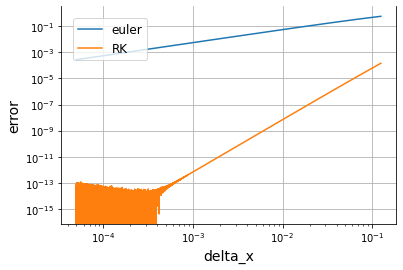

In [ ]:
#可視化
plt.plot(delta_x,error_euler1,label='euler')
plt.plot(delta_x,error_RK1,label='RK')

ax=plt.gca()
ax.spines['top'].set_color('none')

#両対数グラフにする
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('delta_x',size=14,weight ='light')
ax.set_ylabel('error',size=14,weight='light')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=12)
plt.grid(which='major')
plt.show()

In [ ]:
#直線の傾きを求める
np.polyfit(np.log(delta_x),np.log(error_euler1),1)

array([0.9978491 , 0.98161678])

In [ ]:
#x=0.5
#分割数
N_error=np.arange(4,10**4+1)
#刻み幅
delta_x=0.5/N_error

init_x=0.0
init_y=1.0

x=init_x
y=init_y

#オイラー法
total_y2=[]#delta_xごとの全てのyを入れる

for j in range(len(delta_x)):
  x=init_x
  y=init_y
  for i in range(N_error[j]):
    y=Euler(x,y,delta_x[j])
    x+=delta_x[j]
  total_y2.append(y)
  error_euler2=exact_solution(0.5)-total_y2

In [ ]:
#x=0.5
#分割数
N_error=np.arange(4,10**4+1)
#刻み幅
delta_x=0.5/N_error
#delta_x
init_x=0.0
init_y=1.0

x=init_x
y=init_y

#ルンゲクッタ法
total_y_RK2=[]#delta_xごとの全てのyを入れる

for j in range(len(delta_x)):
  x=init_x
  y=init_y
  for i in range(N_error[j]):
    y=Runge_kutta(x,y,delta_x[j])
    x+=delta_x[j]
  total_y_RK2.append(y)
  error_RK2=exact_solution(0.5)-total_y_RK2

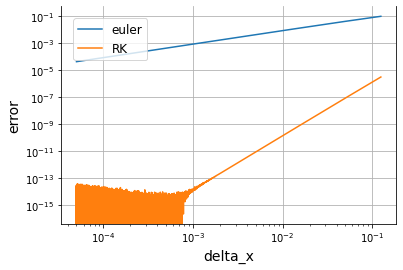

In [ ]:
#可視化
plt.plot(delta_x,error_euler2,label='euler')
plt.plot(delta_x,error_RK2,label='RK')

ax=plt.gca()
ax.spines['top'].set_color('none')

#両対数グラフにする
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('delta_x',size=14,weight ='light')
ax.set_ylabel('error',size=14,weight='light')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=12)
plt.grid(which='major')
plt.show()

In [ ]:
np.polyfit(np.log(delta_x),np.log(error_euler2),1)

array([ 0.9990553 , -0.20187347])

In [ ]:
#x=0.25
#分割数
N_error=np.arange(4,10**4+1)
#刻み幅
delta_x=0.25/N_error
#delta_x
init_x=0.0
init_y=1.0

x=init_x
y=init_y

#オイラー法
total_y3=[]#delta_xごとの全てのy

for j in range(len(delta_x)):
  x=init_x
  y=init_y
  for i in range(N_error[j]):
    y=Euler(x,y,delta_x[j])
    x+=delta_x[j]
  total_y3.append(y)
  error_euler3=exact_solution(0.25)-total_y3

In [ ]:
#x=0.25
#分割数
N_error=np.arange(4,10**4+1)
#刻み幅
delta_x=0.25/N_error
#delta_x
init_x=0.0
init_y=1.0

x=init_x
y=init_y

#ルンゲクッタ法
total_y_RK3=[]#delta_xごとの全てのyを入れる

for j in range(len(delta_x)):
  x=init_x
  y=init_y
  for i in range(N_error[j]):
    y=Runge_kutta(x,y,delta_x[j])
    x+=delta_x[j]
  total_y_RK3.append(y)
  error_RK3=exact_solution(0.25)-total_y_RK3

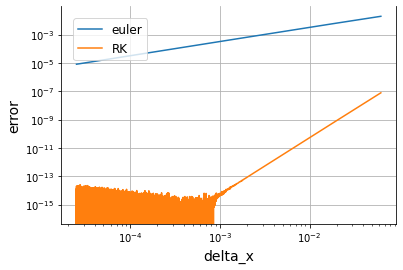

In [ ]:
#可視化
plt.plot(delta_x,error_euler3,label='euler')
plt.plot(delta_x,error_RK3,label='RK')

ax=plt.gca()
ax.spines['top'].set_color('none')

#両対数グラフにする
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('delta_x',size=14,weight ='light')
ax.set_ylabel('error',size=14,weight='light')

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=12)
plt.grid(which='major')
plt.show()

In [ ]:
np.polyfit(np.log(delta_x[:50]),np.log(error_RK3[:50]),1)

array([ 3.98586208, -5.306423  ])